# Newton Raphson

Newton Raphson belongs to the family of iterative optimization algorithm. 

We can use the algorithm to find root of function $g(x)=0$, with the formula denoted as 
$$x_{k+1} = x_{k} - \frac{g(x)}{g'(x)}$$

But we can also extend and generalize the formula as optimization algorithm, ie. $f'(x)=0$. The iterative formula is thus denoted as

$$x_{k+1} = x_{k} - H(x_k)^{-1}\nabla(x_k)$$

But how is it derived, what is the intuition behind the algorithm? Let's take a look at the following example

# Example

Consider the simple example $y=x^3 + 3x^2 + 100$

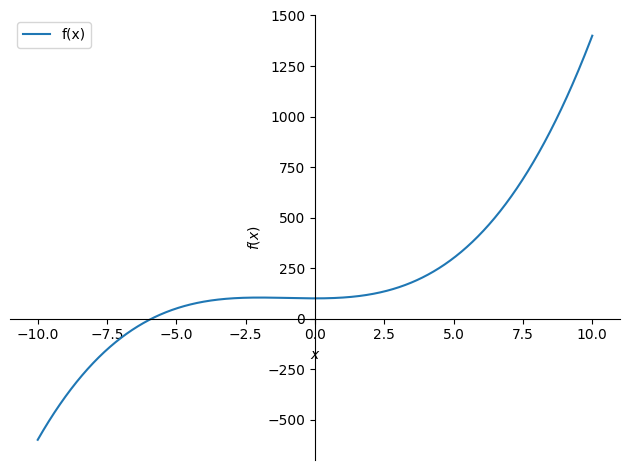

In [11]:
from sympy.plotting import plot, plot_implicit
import sympy as sp
from sympy import Eq


x, y = sp.symbols('x y')

p1 = plot(x**3+3*x**2+100, (x, -10, 10), show=False, label='f(x)')
p1.legend = True
p1.show()

We start off with a random point $x_k$ (say 7.5 in this example). 

The idea of Newton Raphson is that we want to iteratively move our point $x_k$ such that it progressively get closer and closer to our target.

One idea of how this may work is that we compute the gradient on our point and move to the left if slope is positive and move to the right if slope is negative.

To get the gradient we can use first-order Taylor expansion, ie. 
$$f(x)≈f(x_k​)+f'(x_k​)(x−x_k​)$$

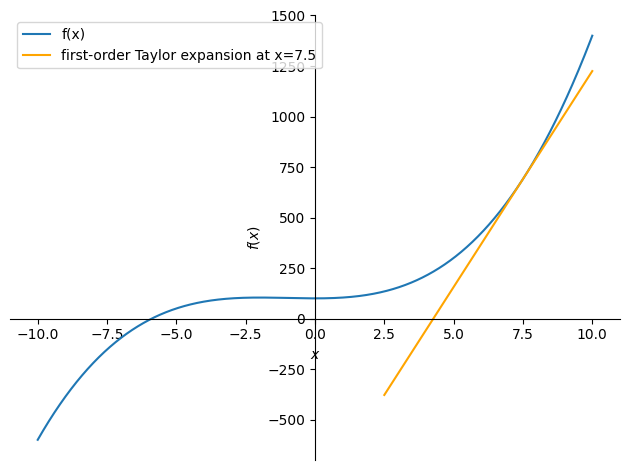

In [38]:
x, y = sp.symbols('x y')

p1 = plot(x**3+3*x**2+100, (x, -10, 10), show=False, label='f(x)')
p2 = plot(213.75*x - 912.5, (x, 2.5, 10), show=False, label="first-order Taylor expansion at x=7.5", line_color='orange')
p1.extend(p2)
p1.legend = True
p1.show()

But how much should we move? One idea may be we move by a fixed rate of gradient (ie. learning rate) by the formula
$$x_{k+1} = x_{k} - \alpha \nabla f(x_k)$$

But can we do better than a fixed alpha? What if we include the curvature of the function at our point as well, ie. the second derivative, the Hessian. The idea is instead of just using the first-order Taylor expansion, we use the second-order Taylor expansion to include information about the curvature as well. That way we can try to get more 'information', especially on how much we should move our point. 

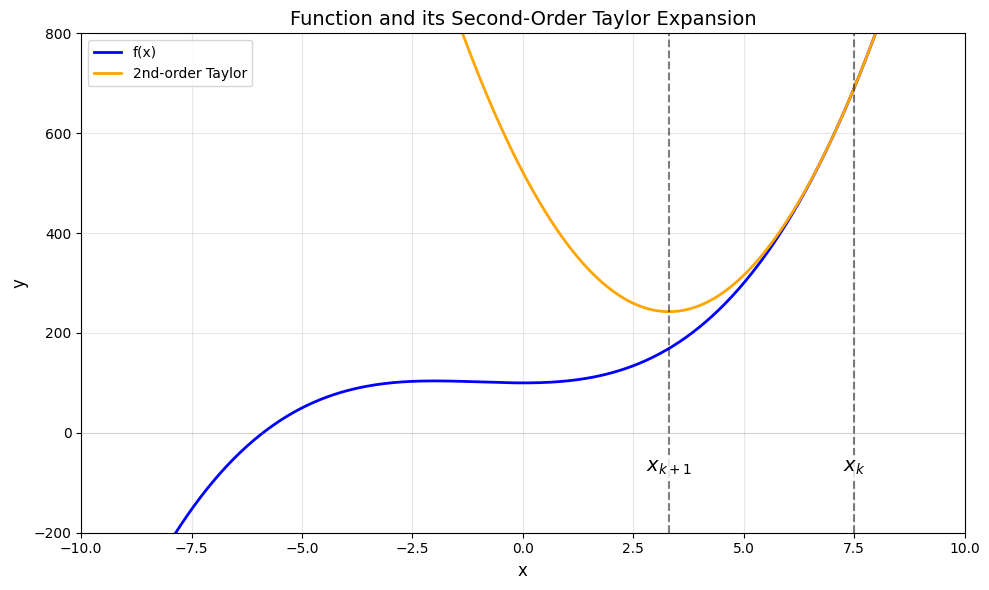

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its approximations
def f(x):
    return x**3 + 3*x**2 + 100

def taylor_2nd(x):
    # 2nd-order Taylor expansion around x=7.5
    return 690.625 + 213.75*(x-7.5) + 25.5*(x-7.5)**2

# Create x values
x_vals = np.linspace(-10, 10, 400)
x_taylor = np.linspace(-2.5, 10, 300)
x_vertical = np.linspace(-200, 800, 100)  # for vertical lines

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original function
ax.plot(x_vals, f(x_vals), 'b-', label='f(x)', linewidth=2)

# Plot Taylor approximation
ax.plot(x_taylor, taylor_2nd(x_taylor), 'orange', 
        label='2nd-order Taylor', linewidth=2)

# Vertical line at x=7.5
ax.axvline(x=7.5, color='black', linestyle='--', alpha=0.5, linewidth=1.5)

# Vertical line at critical point x≈3.309
ax.axvline(x=3.3088, color='black', linestyle='--', alpha=0.5, linewidth=1.5)

# Add text labels near x-axis
ax.text(7.5, -50, r'$x_k$', fontsize=14, ha='center', va='top', 
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))
ax.text(3.3088, -50, r'$x_{k+1}$', fontsize=14, ha='center', va='top',
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=2))

# Add a horizontal line at y=0 for reference
ax.axhline(y=0, color='gray', linestyle='-', alpha=0.3, linewidth=0.5)

# Labels and legend
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_title('Function and its Second-Order Taylor Expansion', fontsize=14)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.3)

# Set axis limits
ax.set_xlim(-10, 10)
ax.set_ylim(-200, 800)

# Show the plot
plt.tight_layout()
plt.show()

Notice that there is a critical point in our second-order Taylor expansion, let's try to solve that.

We first take the first order derivative of the Taylor Expansion
$$ \frac{df}{dx} = f'(x_k) + \frac{1}{2}f''(x_k)(2)(x-x_k)$$

Then we equation it to zero, ie. 

$$0 = f'(x_k) + f''(x_k)(x-x_k)$$
$$-xf''(x_k) = f'(x_k)-x_kf''(x_k)$$
$$ x = x_k-\frac{f'(x_k)}{f''(x_k)} $$

In fact, this is exactly the Newton Raphson formula!

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable, Tuple, Optional

def newton_raphson(
    f: Callable[[float], float],
    f_prime: Callable[[float], float],
    x0: float,
    tol: float = 1e-10,
    max_iter: int = 100,
    verbose: bool = False
) -> Tuple[float, int, list]:
    """
    Newton-Raphson method for finding roots.
    
    Parameters:
    -----------
    f : function
        The function whose root we're finding
    f_prime : function
        Derivative of f
    x0 : float
        Initial guess
    tol : float
        Tolerance for stopping (|f(x)| < tol)
    max_iter : int
        Maximum iterations
    verbose : bool
        Print iterations if True
    
    Returns:
    --------
    x : float
        Approximated root
    iterations : int
        Number of iterations used
    history : list
        History of x values
    """
    x = x0
    history = [x]
    
    for i in range(max_iter):
        fx = f(x)
        fpx = f_prime(x)
        
        if abs(fpx) < 1e-15:
            raise ValueError(f"Derivative too small at x = {x}")
        
        # Newton step
        x_new = x - fx / fpx
        history.append(x_new)
        
        if verbose:
            print(f"Iter {i}: x = {x_new:.10f}, f(x) = {f(x_new):.10e}")
        
        # Check convergence
        if abs(f(x_new)) < tol:
            return x_new, i + 1, history
        
        x = x_new
    
    print(f"Warning: Maximum iterations ({max_iter}) reached")
    return x, max_iter, history

In [ ]:
def f1(x):
    return x**2 - 4

def f1_prime(x):
    return 2*x

root, iterations, history = newton_raphson(f1, f1_prime, x0=3.0, verbose=True)
print(f"\nRoot found: {root:.10f}")
print(f"Iterations: {iterations}")
print(f"Final error: {abs(f1(root)):.2e}")

Iter 0: x = 2.1666666667, f(x) = 6.9444444444e-01
Iter 1: x = 2.0064102564, f(x) = 2.5682117028e-02
Iter 2: x = 2.0000102400, f(x) = 4.0960209716e-05
Iter 3: x = 2.0000000000, f(x) = 1.0485656787e-10
Iter 4: x = 2.0000000000, f(x) = 0.0000000000e+00

Root found: 2.0000000000
Iterations: 5
Final error: 0.00e+00


In [ ]:
# if we want to run optimization on above example, we can do this instead

def f1(x): # make f1 f'(x)
    return 3*x**2 + 6*x

def f1_prime(x): #f1_prime = f''(x)
    return 6*x + 6

root, iterations, history = newton_raphson(f1, f1_prime, x0=3.0, verbose=True)
print(f"\nRoot found: {root:.10f}")
print(f"Iterations: {iterations}")
print(f"Final error: {abs(f1(root)):.2e}")

Iter 0: x = 1.1250000000, f(x) = 1.0546875000e+01
Iter 1: x = 0.2977941176, f(x) = 2.0528087154e+00
Iter 2: x = 0.0341661806, f(x) = 2.0849906752e-01
Iter 3: x = 0.0005643812, f(x) = 3.3872427762e-03
Iter 4: x = 0.0000001592, f(x) = 9.5503948521e-07
Iter 5: x = 0.0000000000, f(x) = 7.6008344027e-14

Root found: 0.0000000000
Iterations: 6
Final error: 7.60e-14
